# Create input parameters and run simulations

In [1]:
from pyexsim12 import *
import matplotlib.pyplot as plt

source_spec = SourceSpec(7.0, 100, 0.06)
fault_geom = FaultGeom((0.0, 0.0), [90.0, 90.0, 3.0], "S", [30.0, 10.0, 2.0, 2.0, 70.0])
hypo = Hypocenter(4.5, 1.5)
rupture = Rupture(0.8)
source = Source(source_spec, fault_geom, hypo, rupture)

source_spec2 = SourceSpec(7.0, 100, 0.02)
source2 = Source(source_spec2, fault_geom, hypo, rupture)

# Path __init__(self, time_pads, crust, geometric_spreading, quality_factor, path_duration)
time_pads = TimePads(50.0, 20.0, 0.002)
crust = Crust(3.7, 2.8)
geometric_spreading = GeometricSpreading(2, [(1.0, -1.0), (40.0, -0.5)])
quality_factor = QualityFactor(60, 180, 0.45)
path_duration = PathDuration()
path = Path(time_pads, crust, geometric_spreading, quality_factor, path_duration)

amplification = Amplification("site_amps.txt")
# misc = Misc(stem="stem", inputs_filename=inputs_filename)
misc = Misc()
misc2 = Misc()
sites = Sites([(0.35933, 0.01000), (0.71865, 0.01000)])

sim = Simulation(source, path, amplification, misc, sites)
sim2 = Simulation(source2, path, amplification, misc2, sites)

sim.create_input_file(save=True)
sim2.create_input_file(save=True)
sim.run()
sim2.run()

C:\Users\abdul\Desktop\Ders\Python\EXSIM_to_python\pyexsim12\simulation.py:216: UserWarning: The simulation has been run before. To override previous results, set override=True while calling the Simulation.run() method
  warnings.warn("The simulation has been run before. To override previous results, set "


# Visualize path inputs

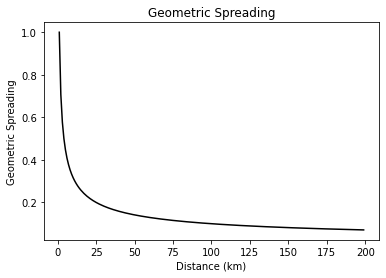

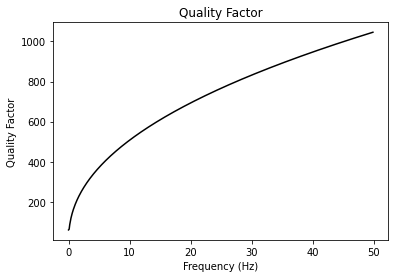

In [2]:
fig_gs = path.geometric_spreading.plot()
fig_qf = path.quality_factor.plot()

# Visualize amplification inputs

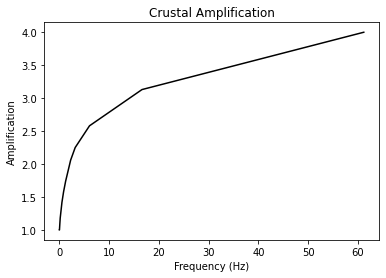

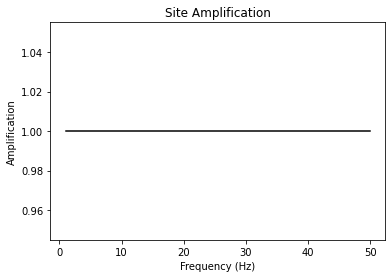

In [3]:
fig_crust = amplification.plot_crustal_amp()
fig_site = amplification.plot_site_amp()

# Plot acceleration records

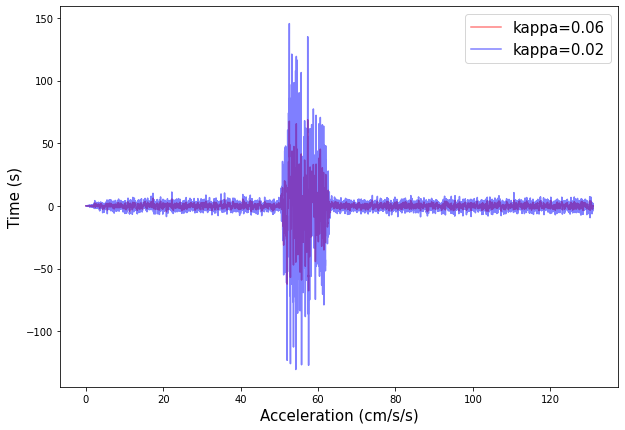

In [8]:
fig_acc, axs_acc = plt.subplots(figsize=(10,7))
sim.plot_acc(1, axis=axs_acc, label="kappa=0.06", color="red", alpha=0.5)
sim2.plot_acc(1, axis=axs_acc, label="kappa=0.02", color="blue", alpha=0.5)
axs_acc.set_ylabel("Time (s)", fontsize=15)
axs_acc.set_xlabel("Acceleration (cm/s/s)", fontsize=15)
axs_acc.legend(prop={'size': 15})

# Plot response spectra

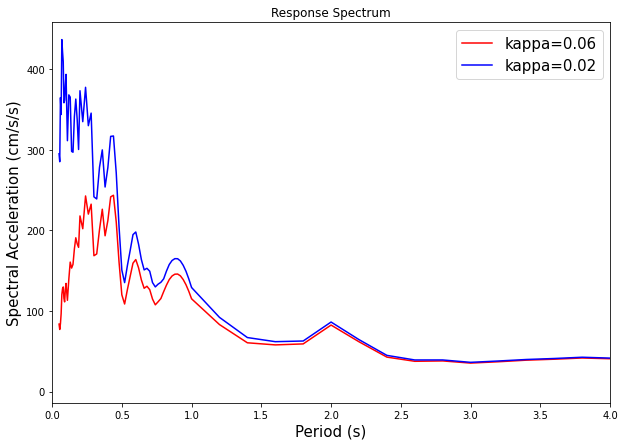

In [10]:
fig, axs = plt.subplots(figsize=(10, 7))
sim.plot_resp_spec(1, axis=axs, label="kappa=0.06", color="red")
sim2.plot_resp_spec(1, axis=axs, label="kappa=0.02", color="blue")
axs.set_xlim(left=0, right=4)
axs.set_xlabel("Period (s)", fontsize=15)
axs.set_ylabel("Spectral Acceleration (cm/s/s)", fontsize=15)
axs.legend(prop={'size': 15})

# Plot Fourier Amplitude Spectra

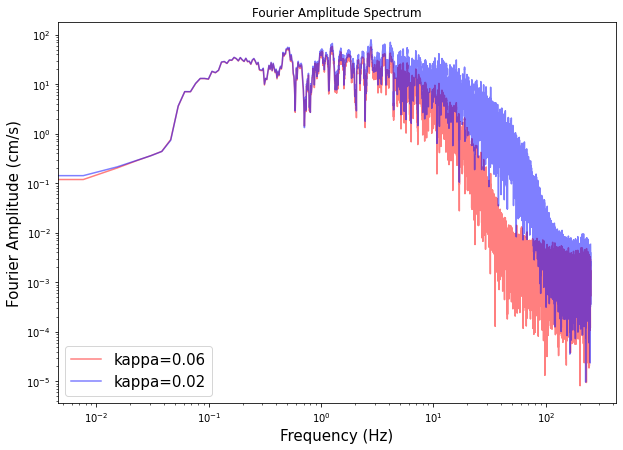

In [12]:
fig_fas, axs_fas = plt.subplots(figsize=(10, 7))
sim.plot_fas(1, axis=axs_fas, label="kappa=0.06", color="red", alpha=0.5)
sim2.plot_fas(1, axis=axs_fas, label="kappa=0.02", color="blue", alpha=0.5)
axs_fas.set_xlabel("Frequency (Hz)", fontsize=15)
axs_fas.set_ylabel("Fourier Amplitude (cm/s)", fontsize=15)
axs_fas.legend(prop={'size': 15})